<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/FORECASTING_MODEL_BASED_METHODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libs :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

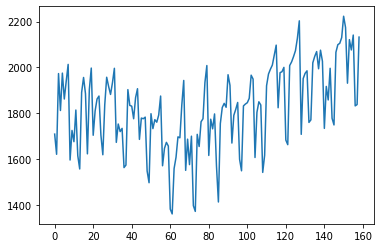

In [3]:
# load the dataset : footfall : no. of people entering a shop or shopping area in a given time

Walmart = pd.read_csv("/content/footfalls.csv")
Walmart.Footfalls.plot()

In [4]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [5]:
# creating a "Date" column :
Walmart["Date"] = pd.to_datetime(Walmart.Month, format = "%b-%y")

# extracting "month","Year","Day" and "weekday" from the date column :

Walmart["month"] = Walmart.Date.dt.strftime("%b") # for month
Walmart["Year"] = Walmart.Date.dt.strftime("%Y") # for year
# Walmart["Day"] = Walmart.Date.dt.strftime("%d") # for day
# Walmart["Weekday"] = Walmart.Date.dt.strftime("%A") # for which day of the week

In [6]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,Year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


In [7]:
# plotting a Heat map :

#plt.figure(figsize = (12,8))
#heatmap_y_month = pd.pivot_table(data = Walmart, values = "Footfalls", index = Year", columns = "month")

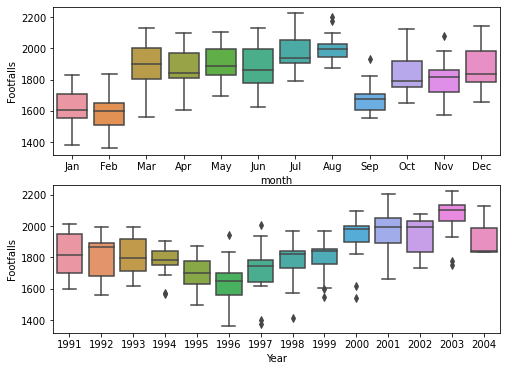

In [8]:
# Boxplot :

plt.figure(figsize = (8,6))
plt.subplot(211)
sns.boxplot(x = "month", y = "Footfalls", data = Walmart) # monthly data
plt.subplot(212)
sns.boxplot(x = "Year", y = "Footfalls", data = Walmart) # yearly data

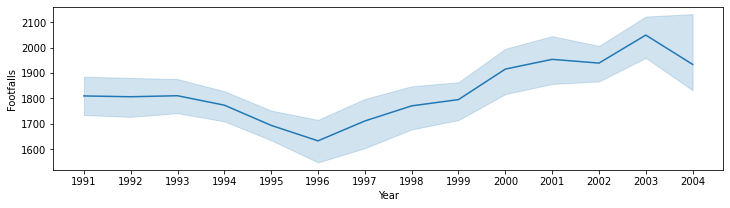

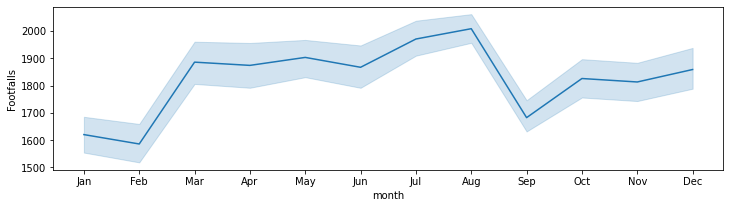

In [9]:
# lineplot :

plt.figure(figsize = (12,3))
sns.lineplot(x = "Year", y = "Footfalls", data = Walmart)

plt.figure(figsize = (12,3))
sns.lineplot(x = "month", y = "Footfalls", data = Walmart)

### **Splitting the data :**

In [10]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [11]:
# Linear model :

import statsmodels.formula.api as smf

linear_model = smf.ols("Footfalls ~ t", data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Footfalls"]) - np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [12]:
# Exponential model :

Exp = smf.ols("log_footfalls ~ t", data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test["t"])))
rmse_Exp = np.sqrt(np.mean((np.array(Test["Footfalls"]) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263569546594

In [13]:
# Quadratic model :

Quad = smf.ols("Footfalls ~ t+t_square", data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test["Footfalls"]) - np.array(pred_Quad))**2))
rmse_Quad

137.15462741356137

In [14]:
# Additive Seasonality :

add_sea = smf.ols("Footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data = Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test["Footfalls"]) - np.array(pred_add_sea))**2))
rmse_add_sea

264.6643900568775

In [15]:
# Additive Seasonality Quadratic :

add_sea_Quad = smf.ols("Footfalls ~ t+t_square + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data = Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","t","t_square"]]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.607245841416486

In [16]:
  # Multiplicative Seasonality :

Mul_sea = smf.ols("log_footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test["Footfalls"]) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266239

In [17]:
# Multiplicative Additive Seasonality :

Mul_Add_sea = smf.ols("log_footfalls ~ t + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test["Footfalls"]) - np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.76726787490355

In [18]:
# Compare the results :

data = {"MODEL" : pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values" : pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


### **Predict for the new time period :**

In [19]:
predict_data = pd.read_csv("Predict_new.csv")

In [20]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [21]:
# Build the model on entire data set :

model_full = smf.ols("Footfalls ~ t + t_square + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data = Walmart).fit()

In [22]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     2213.628216
1     2252.669534
2     2219.210851
3     2331.668836
4     2384.626820
5     2059.418138
6     2206.876122
7     2204.750773
8     2256.708757
9     2028.471300
10    1999.332467
11    2308.270556
dtype: float64

In [23]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [24]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2213.628216
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2252.669534
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2219.210851
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2331.668836
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2384.626820
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2059.418138
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2206.876122
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2204.750773
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2256.708757
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,2028.471300
